In [1]:
#Import Modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline

## 1. Niño 3.4 index

#### 1.1  Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [2]:
#Open the netCDF4 file "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

#Check the data
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
# 计算SST anomalies(海表温度异常)，下文用sst_anom表示

#Group data by month
group_data = ds.sst.sel(lat=slice(-5,5),lon=slice(120,170)).groupby('time.month')

#Monthly climatology for sst就是对grouped data求均值，下式可求Niño 3.4区域(5N-5S, 120W-170W)1960-2016年的sst_anom
sst_anom = group_data - group_data.mean(dim='time')

#Check the data
sst_anom.data

array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.6212349 , -0.5504303 , -0.48267746, ..., -0.68665695,
         -0.6161804 , -0.6163101 ],
        [-0.34970474, -0.29545593, -0.3325386 , ..., -0.77547646,
         -0.7685814 , -0.7126312 ],
        [-0.17095375, -0.17284012, -0.23443985, ..., -0.8361454 ,
         -0.82535934, -0.8006687 ],
        [-0.24916267, -0.223135  , -0.2143879 , ..., -0.7794876 ,
         -0.78274345, -0.779541  ],
        [-0.34809303, -0.3074398 , -0.268713  , ..., -0.58963966,
         -0.61

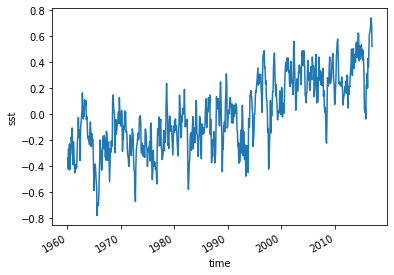

In [4]:
# Niño 3.4 index指的是Niño 3.4区域内的sst_anom 的平均值

#求权重
weights = np.cos(np.deg2rad(sst_anom.lat))

# Compute and plot the correct global monthly SST
sst_anom_weighted = sst_anom.weighted(weights)

#求Niño 3.4区域的sst_anom的平均
Niño34_index = sst_anom_weighted.mean(dim=('lon', 'lat'))
Niño34_index.plot()

#### 1.2 Visualize the computed Niño 3.4. Your plot should look similar to this one.

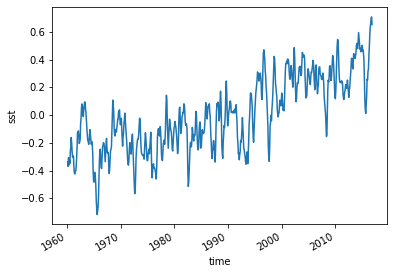

In [5]:
# Niño 3.4 index三个月的滑动平均值
moving_average = Niño34_index.rolling(time=3, center=True).mean()
moving_average.plot()

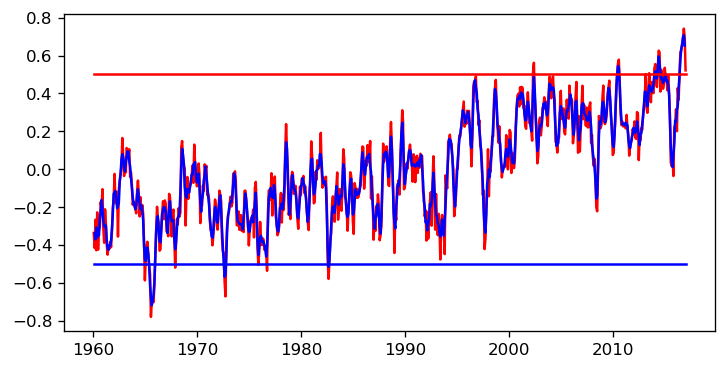

In [9]:
#绘图
time=ds['time'][:]

fig, ax = plt.subplots(figsize=(7,3.5),sharey=False, dpi=120)

ax.plot(time,Niño34_index.data,color='r')
ax.plot(time,moving_average.data,color='b')

#画-0.5和0.5的直线
a1 = np.full((684,1), 0.5)
a2 = np.full((684,1), -0.5)
ax.plot(time,a1,color='r')
ax.plot(time,a2,color='b')

## 2. Earth’s energy budget

In [10]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

#### 2.1  Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

In [11]:
#Open the netCDF4 file "NOAA_NCDC_ERSST_v3b_SST.nc"
ds2 = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

#Check the data
ds2

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

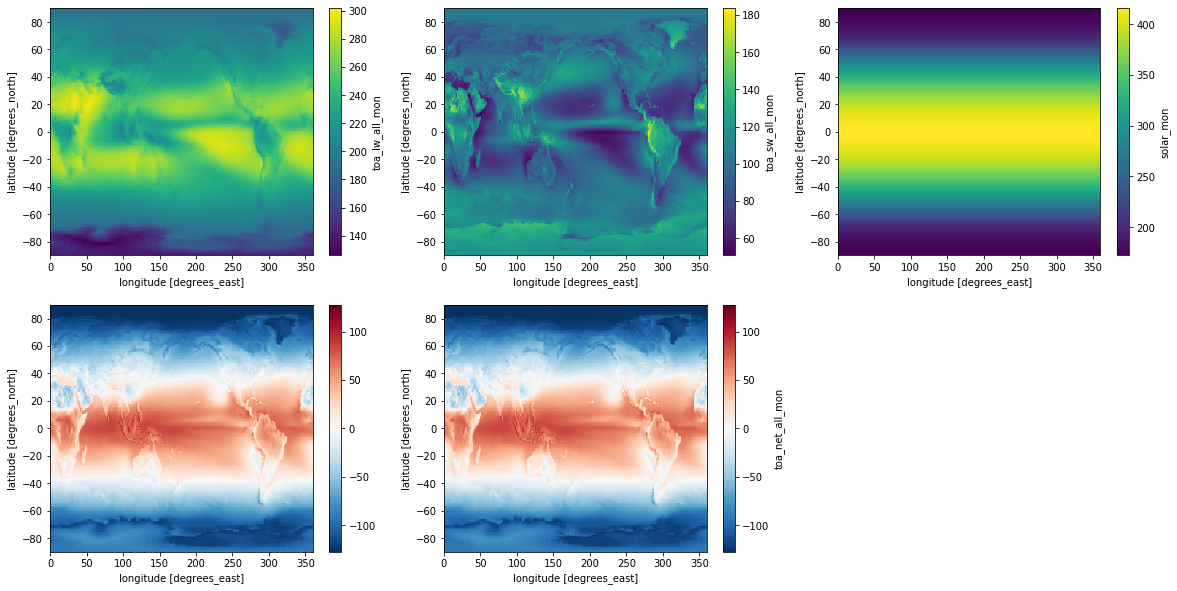

In [12]:
#利用subplot来打印要求的五幅图
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
ds2.toa_lw_all_mon.mean(dim='time').plot()

plt.subplot(2, 3, 2)
ds2.toa_sw_all_mon.mean(dim='time').plot()

plt.subplot(2, 3, 3)
ds2.solar_mon.mean(dim='time').plot()

plt.subplot(2, 3, 4)
(ds2.solar_mon.mean(dim='time') - ds2.toa_lw_all_mon.mean(dim='time') - ds2.toa_sw_all_mon.mean(dim='time')).plot()

plt.subplot(2, 3, 5)
ds2.toa_net_all_mon.mean(dim='time').plot()

plt.show()

#Yes, they are quivalent to the TOA net flux （the figure (2, 3, 4) and (2, 3, 5) are same ）


#### 2.2 Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

In [13]:
#不同位置的栅格的面积不同，因此要生成权重
weights2 = np.cos(np.deg2rad(ds2.lat))

toa_lw_weighted = ds2.toa_lw_all_mon.weighted(weights2)
toa_sw_weighted = ds2.toa_sw_all_mon.weighted(weights2)
solar_weighted = ds2.solar_mon.weighted(weights2)

sum_lw_sw = toa_lw_weighted.mean(dim=('lat', 'lon', 'time')) + toa_sw_weighted.mean(dim=('lat', 'lon', 'time'))
solar = solar_weighted.mean(dim=('lat', 'lon', 'time'))

print('sum_lw_sw:',sum_lw_sw)
print('solar:',solar)
print('solar - sum_lw_sw',solar - sum_lw_sw)

#Yes, approximately match up.

sum_lw_sw: <xarray.DataArray ()>
array(339.40497887)
solar: <xarray.DataArray 'solar_mon' ()>
array(340.28326598)
solar - sum_lw_sw <xarray.DataArray ()>
array(0.87828711)


#### 2.3 Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

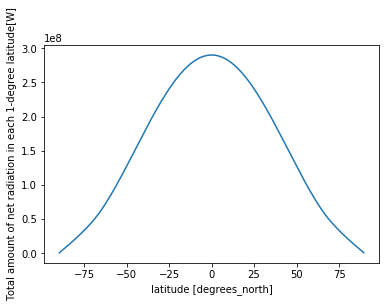

In [14]:
#对纬度求平均
solar_mean_lat = ds2.solar_mon.mean(dim=('time', 'lon')) #因为经度间距是相同的，故而纬度可以压缩成一个点考虑
#每个纬度下对应栅格的面积计算，纬度间距一度约(111100*cos lat）m，每个纬度的点都应该附上权重
#纬度间距参考自：https://zhidao.baidu.com/question/1390127973481256580.html
area_lat = 2 * np.pi * 111100 * np.cos(np.deg2rad(ds2.lat))
solar_amount = solar_mean_lat * area_lat
solar_amount.plot()
plt.ylabel('Total amount of net radiation in each 1-degree latitude[W]')
plt.show()

## 3. Explore a netCDF dataset

#### 3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.

In [15]:
#Open the netCDF4 file "CRUTEM.5.0.1.0.anomalies.nc"
ds3 = xr.open_dataset("CRUTEM.5.0.1.0.anomalies.nc", engine="netcdf4")

#Check the data
ds3

<xarray.Dataset>
Dimensions:         (time: 2061, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2021-09-16
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tas             (time, latitude, longitude) float64 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (latitude, bnds) float64 ...
    longitude_bnds  (longitude, bnds) float64 ...
Attributes:
    comment:      CRUTEM5 air temperature at 2m
    history:      Data set built at: 2021-10-21T19:03:35+00:00
    institution:  Climatic Research Unit, University of East Anglia/Met Offic...
    licence:      CRUTEM5 is licensed under the Open Government Licence v3.0 ...
    reference:    Osborn, T. J., P. D. Jones, D. H. Lister, C. P. Morice, I. ...
    source:       
    title:        CRUTEM5 air temperature over land
    version:      CRUTEM.5.0.1.0
    Conventions:  CF-1.7

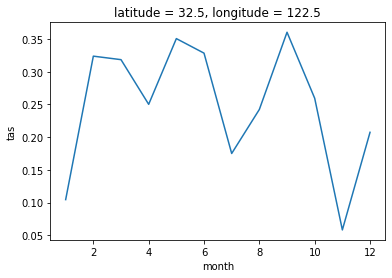

In [16]:
#绘制tas的时间序列

#Group data by month
group_data3 = ds3.tas.groupby('time.month').mean(dim='time')

#绘制在某点(120E,30N)附近的tas的时间序列
group_data3.sel(longitude=120,latitude=30,method='nearest').plot()

#### 3.2 Make at least 5 different plots using the dataset.

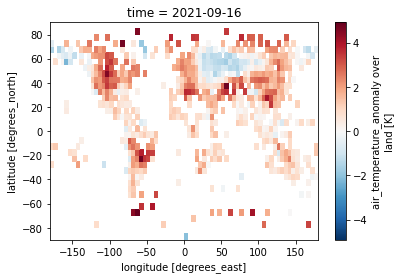

In [17]:
#Type 1: 绘制最近一个月全球 mean tas（2D plot）
ds3.tas[-1].plot()

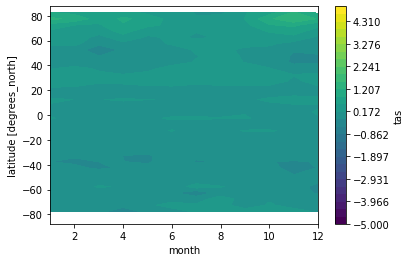

In [18]:
#Type 2:Plot zonal mean climatology（等值线图）
tas_clim = ds3.tas.groupby('time.month').mean()
tas_clim.mean(dim='longitude').plot.contourf(x='month', 
                                       levels=30, vmin=-5, vmax=5)

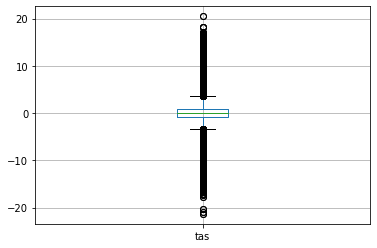

In [19]:
#Type 4: 绘制箱线图

#将netCDF文件转换为pandas的dataframe数据类型
df3 = ds3.to_dataframe()

#去掉多余的两列variables
df3 = df3.drop(columns=['latitude_bnds'])
df3 = df3.drop(columns=['longitude_bnds'])
df3.boxplot()

(array([1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        4.00000e+00, 4.00000e+00, 4.00000e+00, 6.00000e+00, 9.00000e+00,
        1.10000e+01, 1.00000e+01, 1.30000e+01, 2.20000e+01, 3.50000e+01,
        4.60000e+01, 6.00000e+01, 8.10000e+01, 1.02000e+02, 1.27000e+02,
        1.56000e+02, 1.67000e+02, 2.83000e+02, 3.12000e+02, 4.29000e+02,
        5.57000e+02, 6.68000e+02, 8.29000e+02, 9.66000e+02, 1.15700e+03,
        1.56100e+03, 1.88300e+03, 2.46700e+03, 3.11900e+03, 4.02800e+03,
        5.15400e+03, 6.79400e+03, 8.93400e+03, 1.22430e+04, 1.74980e+04,
        2.43710e+04, 3.54860e+04, 5.27980e+04, 7.87480e+04, 1.15580e+05,
        1.54434e+05, 1.62864e+05, 1.31732e+05, 9.36420e+04, 6.44810e+04,
        4.47080e+04, 3.09960e+04, 2.22340e+04, 1.57300e+04, 1.15150e+04,
        8.58100e+03, 6.33800e+03, 4.76900e+03, 3.72600e+03, 2.86100e+03,
        2.28000e+03, 1.83400e+03, 1.48100e+03, 1.15

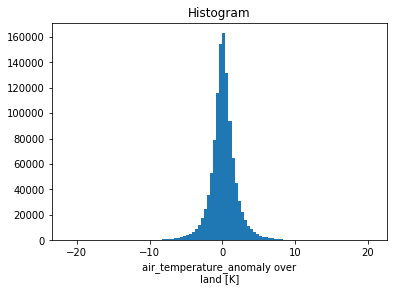

In [20]:
#Type 3:直方图
ds3.tas.plot(bins=100)

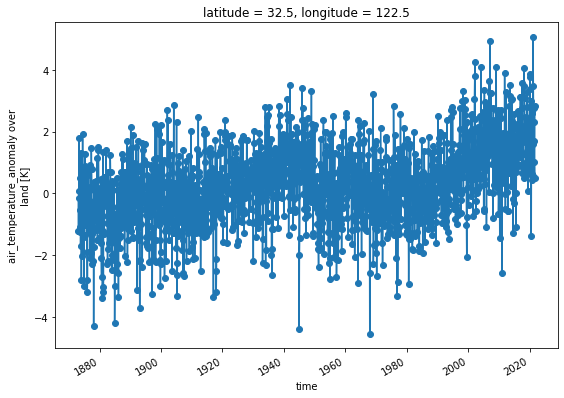

In [21]:
#Type 4:时间序列1D图
ds3.tas.sel(longitude=120,latitude=30,method='nearest').plot(marker="o", size=6)